In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

# Import Data and Creating Labels

In [15]:
df = pd.read_csv("Features.csv")
df = df[df.name != "name"]
df.columns

Index(['name', 'SDx', 'SDy', 'SDz', 'SR', 'PFD_t', 'PFD_i', 'PFD_m', 'PFD_r',
       'PFD_p', 'FA_ti', 'FA_im', 'FA_mr', 'FA_rp', 'FA_pt', 'FD_ti', 'FD_tm',
       'FD_tr', 'FD_tp', 'FD_im', 'FD_ir', 'FD_ip', 'FD_mr', 'FD_mp', 'FD_rp'],
      dtype='object')

In [16]:
createLabels = pd.DataFrame(df,columns=['name'])
createLabels.rename(columns={'name':'0'},inplace = True)
for index,row in createLabels.iterrows():
    createLabels.set_value(index,'0',row['0'][0])
createLabels.to_csv("labelsForTestAndTrain.csv")
createLabels.head(60)
#df['column'] = df['column'].astype('str') 
#createLabels.describe
# labels = pd.read_csv("labelsOnly.csv")
# labels.drop(columns=['Unnamed: 0'])

,0
0,A
1,A
2,A
3,A
4,A
5,A
6,A
7,A
8,A
9,A


In [17]:
le = preprocessing.LabelEncoder()
le.fit(createLabels['0'])
LabelEncoder()
list(le.classes_)

letter_mappings = dict()
# create csv of letter to label mappings
for i in range(0, len(le.classes_)):
    letter_mappings[le.classes_[i]] = i
#letter_mappings

In [18]:
transformedLabels = le.transform(createLabels['0']) 
np.unique(transformedLabels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [19]:
df['labels'] = transformedLabels
df
# corr = df.corr()
# plt.figure(figsize = (30,10))
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )

,name,SDx,SDy,SDz,SR,PFD_t,PFD_i,PFD_m,PFD_r,PFD_p,...,FD_tm,FD_tr,FD_tp,FD_im,FD_ir,FD_ip,FD_mr,FD_mp,FD_rp,labels
0,A0,0,0,0,33.483856,61.37995911,53.21684265,56.40392685,53.43012619,44.78738022,...,46.36806488,51.0112381,56.90402603,9.176234245,18.44831467,31.24397278,11.34841919,26.6734066,16.26328468,0
1,A1,0,0,0,33.50679,61.69601822,53.2153244,56.50469589,53.46884537,44.79497528,...,45.54101944,50.50247574,56.72613907,9.036010742,18.44128799,31.24827385,11.41685963,26.74730492,16.26682281,0
2,A2,0,0,0,33.50679,61.69601822,53.2153244,56.50469589,53.46884537,44.79497528,...,45.54101944,50.50247574,56.72613907,9.036010742,18.44128799,31.24827385,11.41685963,26.74730492,16.26682281,0
3,A3,0,0,0,33.50849,61.92037201,53.2148819,56.50305176,53.46571732,44.82241058,...,45.33668137,50.38727188,56.68595123,9.02839756,18.44114494,31.24591827,11.41672897,26.74497604,16.25867271,0
4,A4,0,0,0,33.50849,61.92037201,53.2148819,56.50305176,53.46571732,44.82241058,...,45.33668137,50.38727188,56.68595123,9.02839756,18.44114494,31.24591827,11.41672897,26.74497604,16.25867271,0
5,A5,0,0,0,33.50849,61.92037201,53.2148819,56.50305176,53.46571732,44.82241058,...,45.33668137,50.38727188,56.68595123,9.02839756,18.44114494,31.24591827,11.41672897,26.74497604,16.25867271,0
6,A6,0,0,0,33.50849,61.92037201,53.2148819,56.50305176,53.46571732,44.82241058,...,45.33668137,50.38727188,56.68595123,9.02839756,18.44114494,31.24591827,11.41672897,26.74497604,16.25867271,0
7,A7,0,0,0,33.50849,61.92037201,53.2148819,56.50305176,53.46571732,44.82241058,...,45.33668137,50.38727188,56.68595123,9.02839756,18.44114494,31.24591827,11.41672897,26.74497604,16.25867271,0
8,A8,0,0,0,33.50849,61.92037201,53.2148819,56.50305176,53.46571732,44.82241058,...,45.33668137,50.38727188,56.68595123,9.02839756,18.44114494,31.24591827,11.41672897,26.74497604,16.25867271,0
9,A9,0,0,0,33.50849,61.92037201,53.2148819,56.50305176,53.46571732,44.82241058,...,45.33668137,50.38727188,56.68595123,9.02839756,18.44114494,31.24591827,11.41672897,26.74497604,16.25867271,0


# SVM

In [20]:
##SVM
df = df.drop(columns=['name'])
#df.describe()

In [21]:
df = df.apply(pd.to_numeric, errors='coerce')
#df.dtypes

In [22]:
# ##Normalize and Scale

# #Normalize
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])
# df



In [23]:
# #Scale


# size = len(df.columns)
# for i, row in df.iterrows():
#     max = np.max(row[:-1])
#     for index, val in enumerate(row):
#         if (index < size - 1):
#             #print("Val ",val)
#             #print("Max ",max)
#             scaled =  val / max
#             df.set_value(i,df.columns[index],scaled)
#             #print(row)
        

# #scaleFeatures(df)
# df

In [24]:
X = df.drop('labels', axis=1)  
y = df['labels']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)  

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# svclassifier = SVC()

# #Create a dictionary of possible parameters
# params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
#           'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
#           'kernel':['linear','poly'] }

# #Create the GridSearchCV object
# grid_clf = GridSearchCV(SVC(class_weight='balanced'), params_grid)

# #Fit the data with the best possible parameters
# grid_clf = grid_clf.fit(X_train, y_train)

# #Print the best estimator with it's parameters
# print(grid_clf.best_params_)

In [27]:
#Import knearest neighbors Classifier model
#from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
#svclassifier = KNeighborsClassifier(n_neighbors=8)

In [28]:
svclassifier = SVC(kernel='poly',degree=10)  

In [29]:
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = svclassifier.predict(X_test)  
y_pred

array([22,  4,  4, ...,  3, 11, 10])

In [31]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics

In [32]:
metrics.accuracy_score(y_pred,y_test)

0.9981481481481481

# Testing

In [33]:
###Testing on new data (N and M)

In [34]:
# dfTest = pd.read_csv("FeatureSetTest.csv")
# dfTest = dfTest[dfTest.name != "name"]
# #dfTest

In [35]:
# labelsForTest = pd.DataFrame(dfTest,columns=['name'])
# labelsForTest.rename(columns={'name':'0'},inplace = True)
# for index,row in labelsForTest.iterrows():
#     labelsForTest.set_value(index,'0',row['0'][0])
# labelsForTest.to_csv("labelsForTest.csv")
# #labelsForTest

In [36]:
# dfTest = dfTest.drop(columns='name')
# dfTest_pred = svclassifier.predict(dfTest)  
# #dfTest_pred

In [37]:
# transformedLabelsForTest = le.transform(labelsForTest['0']) 
# transformedLabelsForTest

# #metrics.accuracy_score(dfTest_pred,transformedLabelsForTest)

In [38]:
# ###Testing on new data (B, C, L and Y)
# dfTest2 = pd.read_csv("FeatureSetTest2.csv")
# dfTest2 = dfTest2[dfTest2.name != "name"]

# labelsForTest2 = pd.DataFrame(dfTest2,columns=['name'])
# labelsForTest2.rename(columns={'name':'0'},inplace = True)
# for index,row in labelsForTest2.iterrows():
#     labelsForTest2.set_value(index,'0',row['0'][0])
# labelsForTest2.to_csv("labelsForTest2.csv")

# dfTest2 = dfTest2.drop(columns='name')

# dfTest_pred2 = svclassifier.predict(dfTest2)  

# transformedLabelsForTest2 = le.transform(labelsForTest2['0']) 
# transformedLabelsForTest2

# #metrics.accuracy_score(dfTest_pred2,transformedLabelsForTest2)

In [39]:
###Testing on new data (entire alphabet)
dfTest4 = pd.read_csv("TestSetLight.csv")
dfTest4 = dfTest4[dfTest4.name != "name"]


labelsForTest4 = pd.DataFrame(dfTest4,columns=['name'])
labelsForTest4.rename(columns={'name':'0'},inplace = True)
for index,row in labelsForTest4.iterrows():
    labelsForTest4.set_value(index,'0',row['0'][0])
labelsForTest4.to_csv("labelsForTest4.csv")

dfTest4 = dfTest4.drop(columns=['name'])
dfTest4 = dfTest4.apply(pd.to_numeric, errors='coerce')

dfTest4

,SDx,SDy,SDz,SR,PFD_t,PFD_i,PFD_m,PFD_r,PFD_p,FA_ti,...,FD_ti,FD_tm,FD_tr,FD_tp,FD_im,FD_ir,FD_ip,FD_mr,FD_mp,FD_rp
0,0,0,0,40.490140,74.809883,41.099361,39.744900,38.208385,37.148186,0.380009,...,66.350243,77.584206,88.191681,96.313507,11.920159,24.317837,35.866856,12.707335,24.994482,12.986700
1,0,0,0,40.400400,74.704178,41.123497,39.829453,38.275909,37.202744,0.381778,...,66.083550,77.332359,87.940262,96.097351,11.912261,24.289377,35.863914,12.697207,25.014748,13.017045
2,0,0,0,40.400400,74.704178,41.123497,39.829453,38.275909,37.202744,0.381778,...,66.083550,77.332359,87.940262,96.097351,11.912261,24.289377,35.863914,12.697207,25.014748,13.017045
3,0,0,0,40.377377,74.666588,41.130318,39.847527,38.292812,37.214622,0.381946,...,66.008110,77.259720,87.870277,96.031929,11.910706,24.286022,35.863094,12.697122,25.018591,13.020507
4,0,0,0,40.355698,74.623039,41.135891,39.863117,38.308064,37.224716,0.382028,...,65.930923,77.186882,87.799927,95.965408,11.911616,24.285583,35.865589,12.697319,25.023176,13.024735
5,0,0,0,40.355698,74.623039,41.135891,39.863117,38.308064,37.224716,0.382028,...,65.930923,77.186882,87.799927,95.965408,11.911616,24.285583,35.865589,12.697319,25.023176,13.024735
6,0,0,0,40.338608,74.585312,41.141792,39.879604,38.324856,37.237362,0.382166,...,65.871574,77.131058,87.744171,95.911217,11.912505,24.283585,35.864456,12.695920,25.023611,13.026100
7,0,0,0,40.322506,74.553764,41.152306,39.899006,38.344883,37.252377,0.382389,...,65.821083,77.081528,87.696396,95.862701,11.911469,24.281836,35.861114,12.696233,25.022772,13.024633
8,0,0,0,40.322506,74.553764,41.152306,39.899006,38.344883,37.252377,0.382389,...,65.821083,77.081528,87.696396,95.862701,11.911469,24.281836,35.861114,12.696233,25.022772,13.024633
9,0,0,0,40.311430,74.529610,41.163876,39.914566,38.360352,37.262833,0.382429,...,65.783241,77.043777,87.659576,95.826042,11.911031,24.280609,35.860119,12.695786,25.022394,13.025059


In [40]:
# dfTest4[dfTest4.columns] = scaler.fit_transform(dfTest4[dfTest4.columns])

# # dfTest4

In [41]:
# size = len(dfTest4.columns)
# for i, row in dfTest4.iterrows():
#     max = np.max(row)
#     for index, val in enumerate(row):
#         #print("Val ",val)
#         #print("Max ",max)
#         scaled =  val / max
#         dfTest4.set_value(i,dfTest4.columns[index],scaled)
#         #print(row)

# #dfTest4

In [42]:
dfTest_pred4 = svclassifier.predict(dfTest4)  
transformedLabelsForTest4 = le.transform(labelsForTest4['0']) 
transformedLabelsForTest4

for i in range(len(dfTest_pred4)):
    if(le.classes_[i//100]  != le.classes_[dfTest_pred4[i]]):
        print(le.classes_[i//100] + " was recognized as " + le.classes_[dfTest_pred4[i]])

A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was recognized as X
A was reco

In [43]:
metrics.accuracy_score(dfTest_pred4,transformedLabelsForTest4)
#print(confusion_matrix(dfTest_pred4,transformedLabelsForTest4))  
#print(classification_report(dfTest_pred4,transformedLabelsForTest4)) 

0.2025

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U11') dtype('<U11') dtype('<U11')

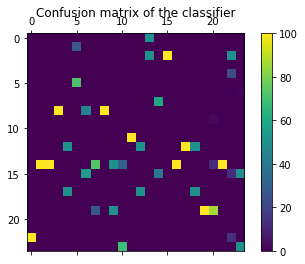

In [44]:
labels = transformedLabelsForTest4
cm = confusion_matrix(dfTest_pred4, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
[i for i, j in zip(dfTest_pred4, transformedLabelsForTest4) if i != j]

In [ ]:
letter_mappings

In [ ]:
df_noSR = pd.read_csv("Features.csv")
df_noSR = df_noSR[df_noSR.name != "name"]
df_noSR = df_noSR.drop(columns=['name'])
df_noSR.columns

In [ ]:
#Scale

#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_noSR[df_noSR.columns[:-1]] = scaler.fit_transform(df_noSR[df_noSR.columns[:-1]])

size = len(df_noSR.columns)
for i, row in df_noSR.iterrows():
    max = np.max(row[:-1])
    for index, val in enumerate(row):
        if (index < size - 1):
            #print("Val ",val)
            #print("Max ",max)
            scaled =  val / max
            df_noSR.set_value(i,df_noSR.columns[index],scaled)
            #print(row)
        


X1 = df_noSR
y1 = df['labels']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.30)  
svclassifier.fit(X_train1, y_train1)

y_predSR = svclassifier.predict(X_test1)  
print(y_predSR)
metrics.accuracy_score(y_predSR,y_test1)

In [ ]:
###Testing on new data (entire alphabet)
dfTest_noSR = pd.read_csv("FeatureSet4.csv")
dfTest_noSR = dfTest_noSR[dfTest_noSR.name != "name"]


labelsForTest_noSR = pd.DataFrame(dfTest_noSR,columns=['name'])
labelsForTest_noSR.rename(columns={'name':'0'},inplace = True)
for index,row in labelsForTest_noSR.iterrows():
    labelsForTest_noSR.set_value(index,'0',row['0'][0])
labelsForTest_noSR.to_csv("labelsForTest4.csv")

dfTest_noSR = dfTest_noSR.drop(columns=['name'])
dfTest_noSR = dfTest_noSR.apply(pd.to_numeric, errors='coerce')

#Scaling
dfTest_noSR[dfTest_noSR.columns] = scaler.fit_transform(dfTest_noSR[dfTest_noSR.columns])
size = len(dfTest_noSR.columns)
for i, row in dfTest_noSR.iterrows():
    max = np.max(row)
    for index, val in enumerate(row):
        #print("Val ",val)
        #print("Max ",max)
        scaled =  val / max
        dfTest_noSR.set_value(i,dfTest_noSR.columns[index],scaled)
        #print(row)

#Predict
dfTest_noSR_pred = svclassifier.predict(dfTest_noSR)  

transformedLabelsForTest_noSR = le.transform(labelsForTest_noSR['0']) 
transformedLabelsForTest_noSR

print(dfTest_noSR_pred)
for i in range(len(dfTest_noSR_pred)):
    if(i % 50 == 0 and le.classes_[i//50]  != le.classes_[dfTest_noSR_pred[i]]):
        print(le.classes_[i//50] + " was recognized as " + le.classes_[dfTest_noSR_pred[i]])

In [ ]:
metrics.accuracy_score(dfTest_noSR_pred,transformedLabelsForTest_noSR)

In [ ]:
import pymysql.cursors
import pymysql

In [ ]:
# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='brianowen',
                             db='fingerspell_db',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

In [ ]:
try:
    ##How to execute commands
    ##Don't forget to commit 
    with connection.cursor() as cursor:
        # Read a single record
        sql = "SELECT * FROM gestures"
        cursor.execute(sql)
        result = cursor.fetchone()
        print(result)
finally:
    connection.close()

In [ ]:
from sklearn_porter import Porter

In [ ]:
#porter = Porter(svclassifier, language='java')
#output = porter.export(embed_data=True)
#print(output)